Fundamental Matrix:
 [[ 4.45450512e-07  2.39549781e-07 -1.02377405e-03]
 [ 2.35540712e-07 -6.09017381e-09 -2.83747092e-04]
 [-6.05702747e-04 -1.23661025e-04  1.00000000e+00]]


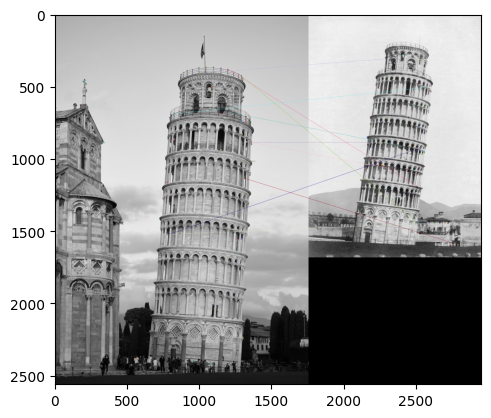

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1, img2 = cv2.imread('f1.jpg', 0), cv2.imread('f2.jpg', 0)
kp1, des1 = cv2.ORB_create().detectAndCompute(img1, None)
kp2, des2 = cv2.ORB_create().detectAndCompute(img2, None)
matches = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True).match(des1, des2)
pts1, pts2 = np.float32([kp1[m.queryIdx].pt for m in matches]), np.float32([kp2[m.trainIdx].pt for m in matches])
F, _ = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)

print("Fundamental Matrix:\n", F)
plt.imshow(cv2.cvtColor(cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None), cv2.COLOR_BGR2RGB))